<a href="https://colab.research.google.com/github/tomaszjednorowski/Projects/blob/main/Prosta_symulacja_dyskretna_obs%C5%82ugi_ruchu_powietrznego_lotniska.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Temat: Prosta symulacja dyskretna obsługi ruchu powietrznego lotniska


---


##Wczytanie potrzebnych  modułów

In [1]:
!pip install simpy
import simpy
import random
import matplotlib.pyplot as pyplot

##Przygotowanie wstępnych rozkładów losowych

In [2]:
SIM_TIME = 100

ARRIVAL_INTERVAL = round(random.normalvariate(8,2))  
LANDING_DURATION = round(random.expovariate(1/2))
DEPARTURE_INTERVAL = round(random.vonmisesvariate(3.14*0.3,0))
planes = []
time = []
ineTheAirPlot = []
onTheGroundPlot = []


Zdefiniowanie funkcji zwracającej indeks ostatniego samolotu o danym statusie.

In [3]:
def find_index(obj, val):
  for i in range(len(obj)):
    if obj[i].status == val:
      return i

##Zdefiniowane klasy Plane

In [4]:
class Plane(): 
  def __init__(self, id, status):
    self.id = id  
    self.status = status

##Zdefiniowanie klasy Airport

In [5]:
class Airport(object):
    inTheAir = 0
    onTheGround = 0
    runwayFree = True
    arrivalTime = 1
    landingTime = 0
    departureTime = 0
    arrivalInterval = 0
    landingDuration = 0
    departureInterval = 0

    def __init__(self, env, arrivalInterval, landingDuration, departureInterval):
        self.env = env
        self.arrivalInterval = arrivalInterval
        self.landingDuration = landingDuration
        self.departureInterval = departureInterval
        self.action = env.process(self.run())
        self.planes = [] 
    def arrival(self):
        if(self.env.now == self.arrivalTime):
            self.arrivalTime += round(random.expovariate(1/2))
            self.inTheAir += 1
            self.planes.append(Plane(len(self.planes)+1, "air"))
            print(self.env.now, ":  Plane", self.planes[len(self.planes)-1].id, " has arrive. Airplanes in the air: ", self.inTheAir)
           
            if( self.runwayFree ):
                self.runwayFree = False
                self.landingTime = self.env.now + round(random.normalvariate(6,2))
                print(self.env.now, ":  Plane", self.planes[len(self.planes)-1].id, " landing has been planned at ", self.landingTime)

    def landing(self):
        if(self.env.now == self.landingTime):
            if( self.inTheAir > 0):
                self.inTheAir -= 1
                self.onTheGround += 1
                print(self.env.now, ":  Plane", self.planes[find_index(self.planes, "air")].id, " has landed. Airplanes on the ground: ", self.onTheGround, ". Airplanes in the air ", self.inTheAir)
                self.planes[find_index(self.planes, "air")].status = "ground"
                if (self.onTheGround==1):
                    self.departureTime = self.env.now + round(random.vonmisesvariate(3.14*0.4,0))
                    print(self.env.now,  ":  Plane", self.planes[find_index(self.planes, "ground")].id," departure has been planned at ", self.departureTime)
                if ( self.inTheAir > 0):
                    self.landingTime = self.env.now + round(random.normalvariate(6,2))
                    print(self.env.now,  ":  Plane", self.planes[find_index(self.planes, "air")].id, " landing has been planned at ", self.landingTime)
                else:
                    self.runwayFree = True
                    print(self.env.now, ": Runway is free.")

    def departure(self):
        if(self.env.now == self.departureTime):
            if( self.onTheGround > 0):
                self.onTheGround -= 1
                print(self.env.now, ":  Plane", self.planes[find_index(self.planes, "ground")].id, "  has departured. Airplanes on the ground: ", self.onTheGround, ". Airplanes in the air ", self.inTheAir)
                self.planes[find_index(self.planes, "ground")].status = "off"
                if (self.onTheGround>0):
                    self.departureTime = self.env.now + round(random.vonmisesvariate(3.14*0.4,0))
                    print(self.env.now, ":  Plane", self.planes[find_index(self.planes, "ground")].id, "  departure has been planned at ", self.departureTime)
    def run(self):
        while True:  
            time.append(self.env.now)
            planes.append(len(self.planes)) 
            ineTheAirPlot.append(self.inTheAir)
            onTheGroundPlot.append(self.onTheGround)
            self.arrival()
            self.landing()
            self.departure()
            yield env.timeout(1)

In [6]:
name = "Eric"
>>> profession = "comedian"
>>> affiliation = "Monty Python"
>>> message = (
...     f"Hi {name}. "
...     f"You are a {profession}. "
...     f"You were in {affiliation}."
... )
>>> message
'Hi Eric. You are a comedian. You were in Monty Python.'

'Hi Eric. You are a comedian. You were in Monty Python.'

##Wczytanie właściwej symulacji i wydruk wyników

Rozpocznij prostą symulację ruchu lotniska ARRIVAL_INTERVAL=6, LANDING_DURATION=3, DEPARTURE_INTERVAL=5
1 :  Plane 1  has arrive. Airplanes in the air:  1
1 :  Plane 1  landing has been planned at  8
8 :  Plane 1  has landed. Airplanes on the ground:  1 . Airplanes in the air  0
8 :  Plane 1  departure has been planned at  11
8 : Runway is free.
11 :  Plane 1   has departured. Airplanes on the ground:  0 . Airplanes in the air  0


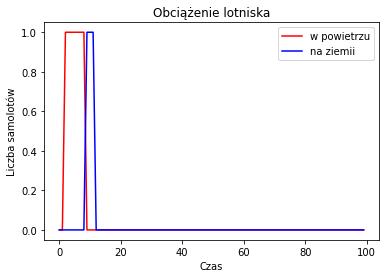

In [7]:
print("Rozpocznij prostą symulację ruchu lotniska "
      "ARRIVAL_INTERVAL={}, "
      "LANDING_DURATION={}, "
      "DEPARTURE_INTERVAL={}".format(ARRIVAL_INTERVAL,LANDING_DURATION,DEPARTURE_INTERVAL))
env = simpy.Environment()
airport = Airport(env,ARRIVAL_INTERVAL,LANDING_DURATION,DEPARTURE_INTERVAL)
env.run(until=SIM_TIME)



line = pyplot.plot(time, ineTheAirPlot, label='w powietrzu')
line2 = pyplot.plot(time, onTheGroundPlot, label='na ziemii')
pyplot.setp(line, color='r')
pyplot.setp(line2, color='b')
pyplot.xlabel("Czas")
pyplot.ylabel("Liczba samolotów")
pyplot.title("Obciążenie lotniska")
pyplot.legend()
pyplot.show()

A=[i for i in ineTheAirPlot if i!=0]
B=[i for i in onTheGroundPlot if i!=0]





### Wydruk listka raportu z symulacji.

In [8]:
Raport = (
        f"Podsumowując:"
        f"Łączna liczba samolotów jakie wzięły udział w symulacji to {max(planes)}."
        f"Liczba samolotów jakie w jednej chwili unosiły się w powietrzu oscyluje wokół {round(sum(ineTheAirPlot)/len(A))}, jest to wartość średnia."
        f"Maksymalnie {max(onTheGroundPlot)} maszyn stanowiło obciążenie płyty lotniska w danej chwili."
        f"Na ziemii w jednym momencie było średnio {round(sum(onTheGroundPlot)/len(B))} samolotów"
)
Raport

'Podsumowując:Łączna liczba samolotów jakie wzięły udział w symulacji to 1.Liczba samolotów jakie w jednej chwili unosiły się w powietrzu oscyluje wokół 1, jest to wartość średnia.Maksymalnie 1 maszyn stanowiło obciążenie płyty lotniska w danej chwili.Na ziemii w jednym momencie było średnio 1 samolotów'